This example is created based on `mlxtend` library's documentation page ([link](https://rasbt.github.io/mlxtend/user_guide/frequent_patterns/association_rules/)). This notebook demonstrates some basic concepts of association analysis 

### Import Packages

In [1]:
import pandas as pd
from itertools import combinations
from collections import Counter
from mlxtend.preprocessing import TransactionEncoder

### Data

Let's create a toy data set for this exercise.

In [2]:
dataset = [['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
           ['Milk', 'Garlic', 'Corn', 'Kidney Beans', 'Yogurt'],
           ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']]

### Prepare (transform) data

Binary representation

In [3]:
te = TransactionEncoder()

te_ary = te.fit(dataset).transform(dataset)

te_ary

array([[False, False, False,  True, False, False,  True,  True,  True,
         True,  True],
       [False, False,  True,  True, False, False,  True, False,  True,
         True,  True],
       [ True, False, False,  True, False, False,  True,  True, False,
        False, False],
       [False,  True, False, False,  True, False,  True,  True, False,
        False,  True],
       [False,  True, False,  True, False,  True,  True, False, False,
         True, False]])

In [6]:
te.columns_

['Apple',
 'Corn',
 'Dill',
 'Eggs',
 'Garlic',
 'Ice cream',
 'Kidney Beans',
 'Milk',
 'Nutmeg',
 'Onion',
 'Yogurt']

In [7]:
# let's create a dataframe from these results
df = pd.DataFrame(te_ary, columns=te.columns_)
df.head()

,Apple,Corn,Dill,Eggs,Garlic,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Yogurt
0,False,False,False,True,False,False,True,True,True,True,True
1,False,False,True,True,False,False,True,False,True,True,True
2,True,False,False,True,False,False,True,True,False,False,False
3,False,True,False,False,True,False,True,True,False,False,True
4,False,True,False,True,False,True,True,False,False,True,False


### `Support`

Calculate `support` for each individual product.

In [8]:
df.sum()

Apple           1
Corn            2
Dill            1
Eggs            4
Garlic          1
Ice cream       1
Kidney Beans    5
Milk            3
Nutmeg          2
Onion           3
Yogurt          3
dtype: int64

In [9]:
item_supports = df.sum() / len(df)
item_supports

Apple           0.2
Corn            0.4
Dill            0.2
Eggs            0.8
Garlic          0.2
Ice cream       0.2
Kidney Beans    1.0
Milk            0.6
Nutmeg          0.4
Onion           0.6
Yogurt          0.6
dtype: float64

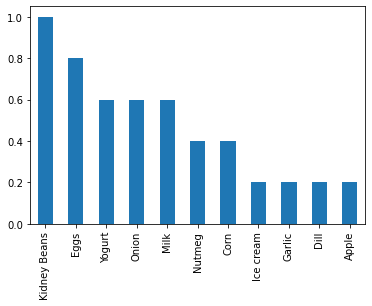

In [10]:
item_supports = item_supports.sort_values(ascending=False)
item_supports.plot.bar();

Extract all two-way combinations.

In [11]:
# let's take the first row as an example first
dataset[0]

['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt']

In [13]:
# extract all two-way combinations
list(combinations(dataset[0], 2))

[('Milk', 'Onion'),
 ('Milk', 'Nutmeg'),
 ('Milk', 'Kidney Beans'),
 ('Milk', 'Eggs'),
 ('Milk', 'Yogurt'),
 ('Onion', 'Nutmeg'),
 ('Onion', 'Kidney Beans'),
 ('Onion', 'Eggs'),
 ('Onion', 'Yogurt'),
 ('Nutmeg', 'Kidney Beans'),
 ('Nutmeg', 'Eggs'),
 ('Nutmeg', 'Yogurt'),
 ('Kidney Beans', 'Eggs'),
 ('Kidney Beans', 'Yogurt'),
 ('Eggs', 'Yogurt')]

We can use this approach to calculate `support` for each pair of items _from the entire dataset_.

In [16]:
item_pairs = []

for i, order in enumerate(dataset):
    pairs = combinations(set(order), 2)
    # for each pair
    for pair in pairs:
        item_pairs.append(pair)
        
item_pairs[:5]

[('Yogurt', 'Kidney Beans'),
 ('Yogurt', 'Eggs'),
 ('Yogurt', 'Onion'),
 ('Yogurt', 'Nutmeg'),
 ('Yogurt', 'Milk')]

In [17]:
len(item_pairs)

56

Count how frequent each item-pair is.

In [21]:
item_pair_ct = Counter(tuple(sorted(pair)) for pair in item_pairs)

In [23]:
item_pair_ct

Counter({('Kidney Beans', 'Yogurt'): 3,
         ('Eggs', 'Yogurt'): 2,
         ('Onion', 'Yogurt'): 2,
         ('Nutmeg', 'Yogurt'): 2,
         ('Milk', 'Yogurt'): 2,
         ('Eggs', 'Kidney Beans'): 4,
         ('Kidney Beans', 'Onion'): 3,
         ('Kidney Beans', 'Nutmeg'): 2,
         ('Kidney Beans', 'Milk'): 3,
         ('Eggs', 'Onion'): 3,
         ('Eggs', 'Nutmeg'): 2,
         ('Eggs', 'Milk'): 2,
         ('Nutmeg', 'Onion'): 2,
         ('Milk', 'Onion'): 1,
         ('Milk', 'Nutmeg'): 1,
         ('Dill', 'Yogurt'): 1,
         ('Dill', 'Kidney Beans'): 1,
         ('Dill', 'Eggs'): 1,
         ('Dill', 'Onion'): 1,
         ('Dill', 'Nutmeg'): 1,
         ('Apple', 'Eggs'): 1,
         ('Apple', 'Kidney Beans'): 1,
         ('Apple', 'Milk'): 1,
         ('Corn', 'Yogurt'): 1,
         ('Garlic', 'Yogurt'): 1,
         ('Corn', 'Kidney Beans'): 2,
         ('Garlic', 'Kidney Beans'): 1,
         ('Corn', 'Milk'): 1,
         ('Corn', 'Garlic'): 1,
         ('Garl

We must use `sorted()` option here because otherwise (Eggs, Kidney Beans) is considered a different set than (Kidney Beans, Eggs).

In [32]:
# store the sorted results
item_pair_ct_sorted = sorted(item_pair_ct.items(), 
                             key=lambda x: x[1], 
                             reverse=True)
item_pair_ct_sorted

[(('Eggs', 'Kidney Beans'), 4),
 (('Kidney Beans', 'Yogurt'), 3),
 (('Kidney Beans', 'Onion'), 3),
 (('Kidney Beans', 'Milk'), 3),
 (('Eggs', 'Onion'), 3),
 (('Eggs', 'Yogurt'), 2),
 (('Onion', 'Yogurt'), 2),
 (('Nutmeg', 'Yogurt'), 2),
 (('Milk', 'Yogurt'), 2),
 (('Kidney Beans', 'Nutmeg'), 2),
 (('Eggs', 'Nutmeg'), 2),
 (('Eggs', 'Milk'), 2),
 (('Nutmeg', 'Onion'), 2),
 (('Corn', 'Kidney Beans'), 2),
 (('Milk', 'Onion'), 1),
 (('Milk', 'Nutmeg'), 1),
 (('Dill', 'Yogurt'), 1),
 (('Dill', 'Kidney Beans'), 1),
 (('Dill', 'Eggs'), 1),
 (('Dill', 'Onion'), 1),
 (('Dill', 'Nutmeg'), 1),
 (('Apple', 'Eggs'), 1),
 (('Apple', 'Kidney Beans'), 1),
 (('Apple', 'Milk'), 1),
 (('Corn', 'Yogurt'), 1),
 (('Garlic', 'Yogurt'), 1),
 (('Garlic', 'Kidney Beans'), 1),
 (('Corn', 'Milk'), 1),
 (('Corn', 'Garlic'), 1),
 (('Garlic', 'Milk'), 1),
 (('Ice cream', 'Kidney Beans'), 1),
 (('Corn', 'Eggs'), 1),
 (('Corn', 'Onion'), 1),
 (('Corn', 'Ice cream'), 1),
 (('Eggs', 'Ice cream'), 1),
 (('Ice cream', 'On

In [33]:
item_pair_dict = {}

for i, pair in enumerate(item_pair_ct_sorted):
    item_pair_dict[pair[0]] = pair[1] / len(dataset)
    
item_pair_dict

{('Eggs', 'Kidney Beans'): 0.8,
 ('Kidney Beans', 'Yogurt'): 0.6,
 ('Kidney Beans', 'Onion'): 0.6,
 ('Kidney Beans', 'Milk'): 0.6,
 ('Eggs', 'Onion'): 0.6,
 ('Eggs', 'Yogurt'): 0.4,
 ('Onion', 'Yogurt'): 0.4,
 ('Nutmeg', 'Yogurt'): 0.4,
 ('Milk', 'Yogurt'): 0.4,
 ('Kidney Beans', 'Nutmeg'): 0.4,
 ('Eggs', 'Nutmeg'): 0.4,
 ('Eggs', 'Milk'): 0.4,
 ('Nutmeg', 'Onion'): 0.4,
 ('Corn', 'Kidney Beans'): 0.4,
 ('Milk', 'Onion'): 0.2,
 ('Milk', 'Nutmeg'): 0.2,
 ('Dill', 'Yogurt'): 0.2,
 ('Dill', 'Kidney Beans'): 0.2,
 ('Dill', 'Eggs'): 0.2,
 ('Dill', 'Onion'): 0.2,
 ('Dill', 'Nutmeg'): 0.2,
 ('Apple', 'Eggs'): 0.2,
 ('Apple', 'Kidney Beans'): 0.2,
 ('Apple', 'Milk'): 0.2,
 ('Corn', 'Yogurt'): 0.2,
 ('Garlic', 'Yogurt'): 0.2,
 ('Garlic', 'Kidney Beans'): 0.2,
 ('Corn', 'Milk'): 0.2,
 ('Corn', 'Garlic'): 0.2,
 ('Garlic', 'Milk'): 0.2,
 ('Ice cream', 'Kidney Beans'): 0.2,
 ('Corn', 'Eggs'): 0.2,
 ('Corn', 'Onion'): 0.2,
 ('Corn', 'Ice cream'): 0.2,
 ('Eggs', 'Ice cream'): 0.2,
 ('Ice cream', 'Oni

### `Support` Filter

In [34]:
# for this exercise, we will use a support threshold of 0.6
min_support = 0.5

# extract all items that satisfy the support criterion
item_supports[item_supports > min_support]

Kidney Beans    1.0
Eggs            0.8
Yogurt          0.6
Onion           0.6
Milk            0.6
dtype: float64

In [ ]:
# print all item-sets that satisfy the support criterion
for key, value item_pair_dict.items():
    if value > min_support:
        prin

______

Instead of doing all these calculations manually, we can use `mlxtend`.

In [ ]:
from mlxtend.frequent_patterns import apriori

frequent_itemsets = apriori(df, min_support=0.5, use_colnames=True)

frequent_itemsets

In [ ]:
from mlxtend.frequent_patterns import association_rules

association_rules(frequent_itemsets, metric='confidence', min_threshold=0.7)

If you are interested in rules according to a different metric of interest, you can simply adjust the metric and `min_threshold` arguments . E.g. if you are only interested in rules that have a `lift` of >= 1.2, you would do the following:

In [ ]:
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1.2)

rules

Pandas DataFrames make it easy to filter the results further. Let's say we are ony interested in rules that satisfy the following criteria:

1. at least 2 antecedents
2. a confidence > 0.75
3. a lift score > 1.2

We could compute the antecedent length as follows:

In [ ]:
rules['antecedent_len'] = rules['antecedents'].apply(lambda x: len(x))

rules

Then, we can use pandas' selection syntax as shown below:

In [ ]:
rules[ (rules['antecedent_len'] >= 2) &
       (rules['confidence'] > 0.75) &
       (rules['lift'] > 1.2) ]